# PyTorch_Learningn (MIVRC)

![](https://ws1.sinaimg.cn/large/abaebc48ly1fqgrsuu355j209x02wjr7.jpg)

## 课程3：数据加载

通常来讲，当你处理图像，声音，文本，视频时需要使用python中其他独立的包来将他们转换为numpy中的数组，之后再转换为torch.*Tensor。

图像的话，可以用Pillow, OpenCV。

声音处理可以用scipy和librosa。

文本的处理使用原生Python或者Cython以及NLTK和SpaCy都可以。

特别的对于图像，我们有torchvision这个包可用,其中包含了一些现成的数据集如：Imagenet, CIFAR10, MNIST等等。同时还有一些转换图像用的工具。

数据加载示例：http://pytorch.org/docs/master/torchvision/datasets.html

### 代码示例（以加载CIFAR10为例）：

In [1]:
import torch
#导入torchvison库
import torchvision
#导入用于数据预处理的transforms包
#import ... as ... 是为了方便操作给导入的包重新命名
import torchvision.transforms as transforms

### 数据预处理

In [2]:
transform=transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

#ToTensor是指把PIL.Image(RGB) 或者numpy.ndarray(H x W x C) 从0到255的值映射到0到1的范围内，并转化成Tensor格式。

#Normalize(mean，std)是通过下面公式实现数据归一化

compose函数会将多个transforms包在一起。

我们的transforms有好几种，例如transforms.ToTensor(), transforms.Scale()等，完整操作列表：http://pytorch.org/docs/master/torchvision/transforms.html

### 加载数据集

In [3]:
#训练集，将相对目录./data下的cifar-10-batches-py文件夹中的全部数据（50000张图片作为训练数据）加载到内存中，若download为True时，会自动从网上下载数据并解压
#root，表示cifar10数据的加载的相对目录
#train，表示是否加载数据库的训练集，false的时候加载测试集
#download，表示是否自动下载cifar数据集
#transform，表示是否需要对数据进行预处理，none为不进行预处理
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


![](https://ws1.sinaimg.cn/large/abaebc48ly1fqgwzkdzwsj20cc05i0te.jpg)

In [4]:
# 看一下训练数据集的长度
print(len(trainset))

50000


In [14]:
#将训练集的50000张图片划分成12500份，每份4张图，用于mini-batch输入。shffule=True在表示不同批次的数据遍历时，打乱顺序。
#batch_size每个min-batch有几张图片
#shuffle是否打乱数据集
#num_workers=2表示使用两个子进程来加载数据集
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=False, num_workers=2)

In [15]:
#和上面一样，下载测试集
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# 看一下测试数据集的长度
print(len(testset))

Files already downloaded and verified
10000


In [16]:
#为每个类别定义名字
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### 随机抽取一些图片进行展示

 frog truck truck  deer   car   car  bird horse


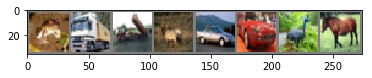

In [22]:
# pyplot是matlab为python提供的一个画图包
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    #改变数据范围，原来为-1-到1，现在转为0-1
    img = img / 2 + 0.5
    npimg = img.numpy()
    #用np.transpose 是因为plt.imshow在显示 时候输入的是（imgsize,imgsieze,channels）,而这里得到的img是（3,200,200）的格式，所以进行了转换，才能显示
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# 随机获取图像
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 显示图像  torchvision.utils.make_grid做一个图像网格
imshow(torchvision.utils.make_grid(images))
# 显示对于的类别标签
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))